## Prediction using Supervised ML:
In this task we will predict the percentage of students based on the no. of study hours.
We will use Linear Regression with Python Scikit Learn. This will be Simple Linear Regression task as it involves just 2 variables.


In [52]:
# Importing required libraries:

import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Loading and reading dataset using url:
url = 'http://bit.ly/w-data'
students_score = pd.read_csv(url)
print('Data loaded successfully')
students_score.head()

Data loaded successfully


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [54]:
# checking the information about the data:
students_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [55]:
# Calculating basic statistical values of data using describe attribute:
students_score.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [56]:
# Checking the null values in data:
students_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

There was no null values and we have almost done all our basic checking. Now we can start our analysis and prediction.

Let's plot our data in a graph so that we can have a idea about relatioship between the data.

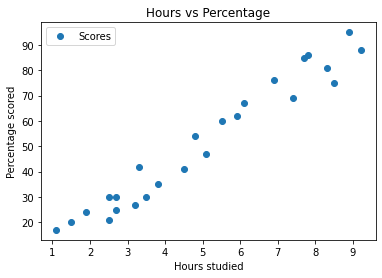

In [57]:
# Plotting the distribution of scores based on study hours:
students_score.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

#### Here, we can clearly see that it's a linear relation between study hours and percentage scored.

### Preparing the data for prediction
We will divide data into two parts; attributes and labels

In [20]:
X = students_score.iloc[:, :-1].values  
y = students_score.iloc[:, 1].values 

Now, we will use Scikit-Learn's built-in train_test_split() method to split this data into training and test sets.

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
No that we have splitted our data into training and testing sets, finally is the time to train our algorithm.

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


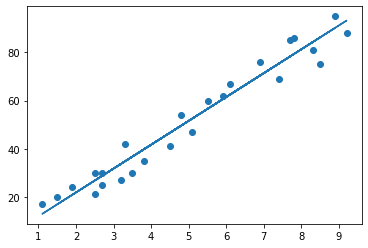

In [58]:
# Plotting the regression line
line = regressor.coef_ * X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions
we have now trained our algorithm, it's time to make some predictions.

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

Now that we have prepared everthing for prediction. Let's predict the score if a student studies for 9.5 hours/day.

In [66]:
hours = np.array(9.25)
hours = hours.reshape(-1,1) # To make the arrays in same shape.
predicted_score = regressor.predict(hours)
print('If a student studies for {} hours/day, the predicted score is {}'.format(hours,predicted_score))

If a student studies for [[9.25]] hours/day, the predicted score is [93.69173249]


### Evaluating the model

This is the final step where we evaluate the performance of algorithm. This is an important step to compare how well different algorithms perform on a particular dataset.
We can use many metrics for that. In this case, we will calculate Mean Absolute Error.

In [69]:
from sklearn import metrics
error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error for our prediction is {}.'.format(error))

Mean Absolute Error for our prediction is 4.183859899002975.


#### This ends our task.